In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from hyperparam_scan_util import GridScanExports

pd.set_option('display.max_columns', None)

%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_format = "svg"

## Load

In [2]:
exports = GridScanExports.load("exports/grid_scans/main_v3.2_manual_Kin")
trials_df = exports.trials
epochs_df = exports.epochs
exports

GridScanExports(69 runs, 530 trials, 25398 epochs)

In [3]:
trials_df.head()

,scan_id,run_id,started_at,finished_at,duration,error,config_hash,config.device_count,config.seed,config.tau,config.I0,config.eps,config.Nhidden,config.Nlayer,config.Nout,config.w_scale,config.T,config.dt,config.gamma,config.Nbatch,config.lr,config.tau_lr,config.beta1,config.beta2,config.p_flip,config.Nepochs,config.Ntrain,config.Nin,config.Nsamples,config.normalize_times,config.K,config.Kin,metrics.acc_init_mean,metrics.acc_init_std,metrics.acc_final_mean,metrics.acc_final_std,metrics.acc_min_epoch,metrics.acc_min_mean,metrics.acc_min_std,metrics.acc_max_epoch,metrics.acc_max_mean,metrics.acc_max_std,metrics.acc_ord_init_mean,metrics.acc_ord_init_std,metrics.acc_ord_final_mean,metrics.acc_ord_final_std,metrics.acc_ord_min_epoch,metrics.acc_ord_min_mean,metrics.acc_ord_min_std,metrics.acc_ord_max_epoch,metrics.acc_ord_max_mean,metrics.acc_ord_max_std,metrics.activity_init_mean,metrics.activity_init_std,metrics.activity_final_mean,metrics.activity_final_std,metrics.activity_min_epoch,metrics.activity_min_mean,metrics.activity_min_std,metrics.activity_max_epoch,metrics.activity_max_mean,metrics.activity_max_std,metrics.activity_first_init_mean,metrics.activity_first_init_std,metrics.activity_first_final_mean,metrics.activity_first_final_std,metrics.activity_first_min_epoch,metrics.activity_first_min_mean,metrics.activity_first_min_std,metrics.activity_first_max_epoch,metrics.activity_first_max_mean,metrics.activity_first_max_std,metrics.epoch_time_mean,metrics.epoch_time_std,metrics.init_compile_time_mean,metrics.init_compile_time_std,metrics.init_optim_time_mean,metrics.init_optim_time_std,metrics.init_phi0_time_mean,metrics.init_phi0_time_std,metrics.init_time_mean,metrics.init_time_std,metrics.init_weights_time_mean,metrics.init_weights_time_std,metrics.loss_init_mean,metrics.loss_init_std,metrics.loss_final_mean,metrics.loss_final_std,metrics.loss_min_epoch,metrics.loss_min_mean,metrics.loss_min_std,metrics.loss_max_epoch,metrics.loss_max_mean,metrics.loss_max_std,metrics.loss_ord_init_mean,metrics.loss_ord_init_std,metrics.loss_ord_final_mean,metrics.loss_ord_final_std,metrics.loss_ord_min_epoch,metrics.loss_ord_min_mean,metrics.loss_ord_min_std,metrics.loss_ord_max_epoch,metrics.loss_ord_max_mean,metrics.loss_ord_max_std,metrics.silent_neurons_init_mean,metrics.silent_neurons_init_std,metrics.silent_neurons_final_mean,metrics.silent_neurons_final_std,metrics.silent_neurons_min_epoch,metrics.silent_neurons_min_mean,metrics.silent_neurons_min_std,metrics.silent_neurons_max_epoch,metrics.silent_neurons_max_mean,metrics.silent_neurons_max_std,metrics.silent_neurons_first_init_mean,metrics.silent_neurons_first_init_std,metrics.silent_neurons_first_final_mean,metrics.silent_neurons_first_final_std,metrics.silent_neurons_first_min_epoch,metrics.silent_neurons_first_min_mean,metrics.silent_neurons_first_min_std,metrics.silent_neurons_first_max_epoch,metrics.silent_neurons_first_max_mean,metrics.silent_neurons_first_max_std,metrics.train_time_mean,metrics.train_time_std
94,main_v3.2_manual_Kin,17056244_1,2024-09-27_17-33-54_995330,2024-09-27_17-36-09_082849,134.087519,None,6832feb4a9182066f8ab6cf87535e4d8,1,0,1.0,1.25,0.000001,128,2,20,0.5,2,0.001,0.01,1000,0.004,100.0,0.9,0.999,0.0,50,None,700,3,True,1000,200,0.046929,0.003832,0.241886,0.010123,0.0,0.046929,0.003832,5.0,0.277906,0.026596,0.046929,0.003832,0.232249,0.008496,0.0,0.046929,0.003832,16.0,0.248758,0.007841,0.753526,0.000229,0.490195,0.014059,41.0,0.485389,0.012624,0.0,0.753526,0.000229,0.367685,0.009661,0.397149,0.005215,0.0,0.367685,0.009661,2.0,0.512252,0.031686,0.800652,0.021920,0.000596,0.000020,0.017318,0.021078,0.024088,0.033073,2.600013,1.089800,0.166052,0.233306,3.007614,0.000051,2.799242,0.023192,5.0,2.291998,0.039311,0.0,3.007614,0.000051,3.007614,0.000051,2.886736,0.007709,1.0,2.857440,0.004601,0.0,3.007614,0.000051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.062500,0.011049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161458,0.037377,40.032612,1.096007
499,main_v3.2_manual_Kin,1

## Error Summary

In [4]:
n_error = trials_df["error"].notna().sum()
print(f"{n_error} / {len(trials_df)} trials contain errors")
print()

for i, error in enumerate(trials_df["error"].dropna().sort_values().unique()):
    short_error = str(error).split("---", 1)[0].strip().split("\n")[-1]
    print(short_error)
    trials = trials_df[trials_df["error"] == error]
    print(f"Appears in {len(trials)} trials: {trials['config_hash'].tolist()}")
    print()

32 / 530 trials contain errors

jaxlib.xla_extension.XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 50074157672 bytes.
Appears in 1 trials: ['6f5a335d68c3770212675f71a8df3bd1']

jaxlib.xla_extension.XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 50074157808 bytes.
Appears in 15 trials: ['844f93651992e778acc49d89b2a4a3f1', 'a95c5d01151c147a245977fa0dc3e376', '8b7a9d134ef293a6cf50c5d3dadd115e', 'c06ea8e2f792e06bb8d08e3f45a59d4a', '912a1c00688c0efefa909eff5df3602d', '26206471717d8df57f1b96555cdfd90e', '6136a42ec9b68b2d19c6dbc7fd7b2672', '34c66fd907192425d035d46e45c4aad3', '61586a997d88aedea97a512f96fa51c7', '992db2256ff1fc446e50cd29916989fd', '37b12a2f7c79fb53ff38697f7c469aaa', 'a91b77c3d85cf7f7cc38bcde4a5b8078', '3459848c19d1ec4a605602f84f40e692', '0415f4011266764ca14ac968ed597f49', 'da757135414eddd584589fc3be687b55']

jaxlib.xla_extension.XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 50074589544 byte

In [5]:
def key_format(key: str):
    return key.removeprefix("config.").removeprefix("metrics.")


input_cols = tuple(
    key for key in trials_df.columns
    if key.startswith("config.") and key != "config.Nin"
)
print("Input columns:", input_cols)

Input columns: ('config.device_count', 'config.seed', 'config.tau', 'config.I0', 'config.eps', 'config.Nhidden', 'config.Nlayer', 'config.Nout', 'config.w_scale', 'config.T', 'config.dt', 'config.gamma', 'config.Nbatch', 'config.lr', 'config.tau_lr', 'config.beta1', 'config.beta2', 'config.p_flip', 'config.Nepochs', 'config.Ntrain', 'config.Nsamples', 'config.normalize_times', 'config.K', 'config.Kin')


In [6]:
from spikegd.utils.data import Data

trials_data = Data(trials_df, input_cols)
print(trials_data.schema())

Data:
  const config.device_count = 1
  const config.seed = 0
  const config.I0 = 1.25
  const config.eps = 1e-06
  const config.Nhidden = 128
  const config.Nout = 20
  const config.w_scale = 0.5
  const config.dt = 0.001
  const config.Nbatch = 1000
  const config.lr = 0.004
  const config.tau_lr = 100.0
  const config.beta1 = 0.9
  const config.beta2 = 0.999
  const config.p_flip = 0.0
  const config.Nepochs = 50
  const config.Ntrain = None
  const config.Nsamples = 3
  const config.normalize_times = True
  var config.tau = 22.6 (310x), 1.0 (220x)
  var config.Nlayer = 3 (340x), 2 (190x)
  var config.T = 64 (310x), 2 (220x)
  var config.gamma = 0.01 (410x), 0.1 (60x), 0.001 (60x)
  var config.K = 1000 (84x), 3000 (84x), 5000 (84x), 7000 (64x), 10000 (64x), 2000 (50x), 1500 (50x), 4000 (50x)
  var config.Kin = 600 (22x), 1200 (21x), 1000 (21x), 2000 (20x), 900 (17x), 1500 (17x), 300 (17x), 3000 (16x), 400 (16x), 800 (16x), 4000 (15x), 500 (12x), 1800 (11x), 2400 (11x), 200 (11x), 50

## Correlations

<Axes: >

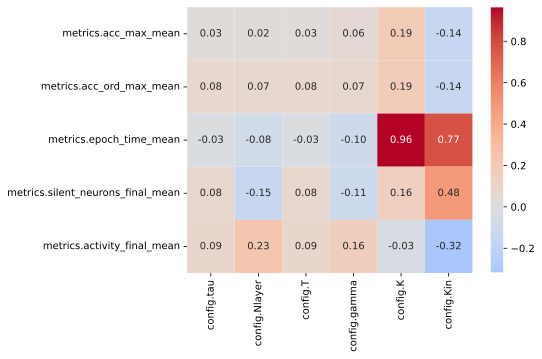

In [7]:
sns.heatmap(
    trials_data.input_var_df.apply(trials_df[[
        "metrics.acc_max_mean",
        "metrics.acc_ord_max_mean",
        "metrics.epoch_time_mean",
        "metrics.silent_neurons_final_mean",
        "metrics.activity_final_mean",
    ]].corrwith),
    annot=True,
    fmt=".2f",
    center=0,
    cmap="coolwarm",
)

## Dependencies on $K$ and $K_\text{in}$

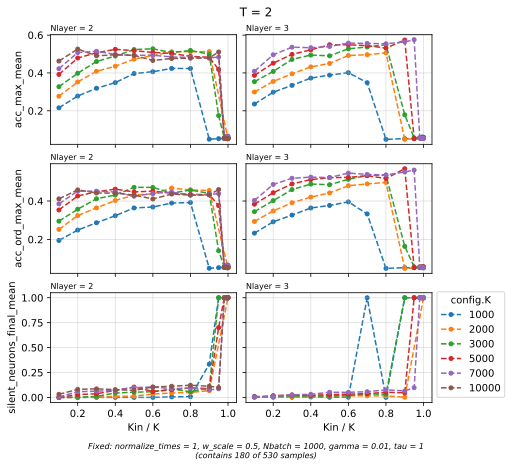

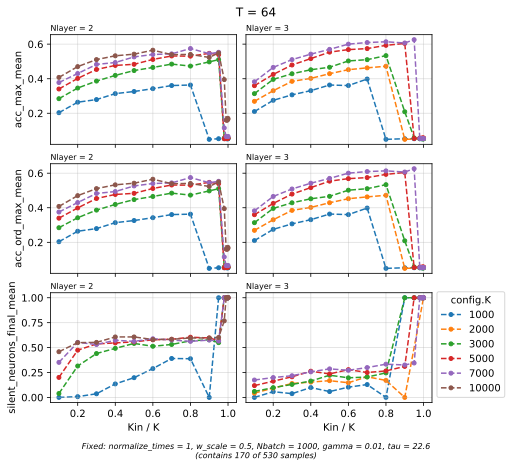

In [8]:
from matplotlib.axes import Axes
from pandas.core.api import DataFrame as DataFrame
from spikegd.utils.plotting import LinePlot, Plot, PlotGrid, _get_val_list

trials_df["Kin / K"] = trials_df["config.Kin"] / trials_df["config.K"]

PlotGrid(
    arg_keys=("Kin / K"),
    func_keys=(
        "metrics.acc_max_mean",
        "metrics.acc_ord_max_mean",
        # "metrics.epoch_time_mean",
        "metrics.silent_neurons_final_mean"
        # "metrics.train_time_mean"
    ),
    func_aggs={"*": "mean"},
    plots=[
        LinePlot(graph_key="config.K"),
    ],
    fixed_values={
        "config.normalize_times": True,
        "config.w_scale": 0.5,
        # "config.K": 700,
        "config.Nbatch": 1000,
        "config.gamma": 0.01,
    },
    whitelists={"config.K": [1000, 2000, 3000, 5000, 7000, 10000]},
    col_keys="config.Nlayer",
    fig_key="config.T",
    indep_keys=set(input_cols) - {"config.Kin"},
    key_format=key_format,
).show(trials_df)

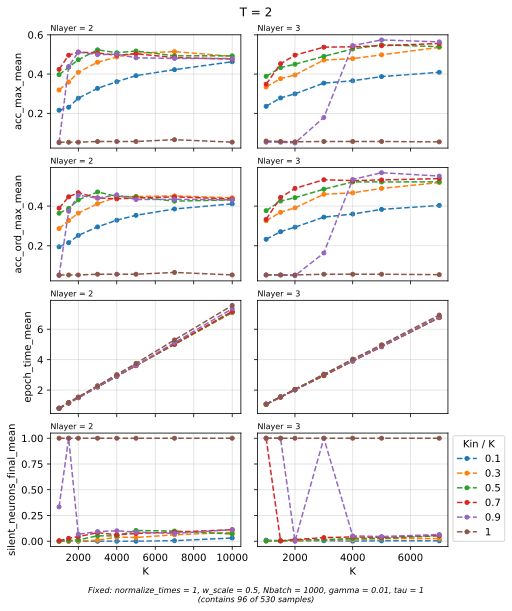

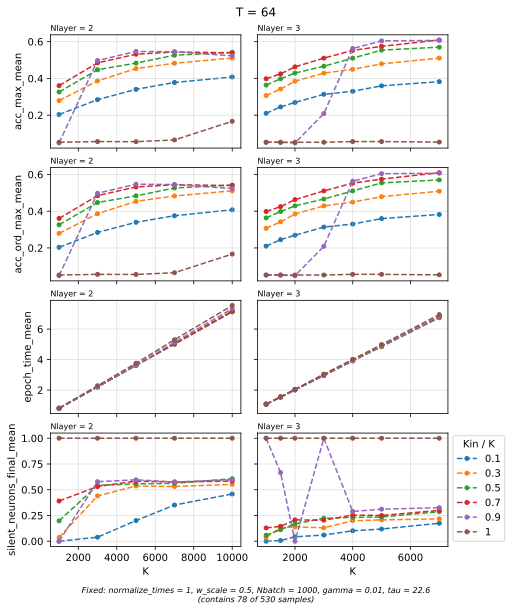

In [9]:
PlotGrid(
    arg_keys=("config.K"),
    func_keys=(
        "metrics.acc_max_mean",
        "metrics.acc_ord_max_mean",
        "metrics.epoch_time_mean",
        "metrics.silent_neurons_final_mean"
        # "metrics.train_time_mean"
    ),
    func_aggs={"*": "mean"},
    plots=[
        LinePlot(graph_key="Kin / K"),
    ],
    fixed_values={
        "config.normalize_times": True,
        "config.w_scale": 0.5,
        "config.Nbatch": 1000,
        "config.gamma": 0.01,
    },
    whitelists={"Kin / K": [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
    col_keys="config.Nlayer",
    fig_key="config.T",
    indep_keys=set(input_cols) - {"config.Kin"},
    key_format=key_format,
).show(trials_df)

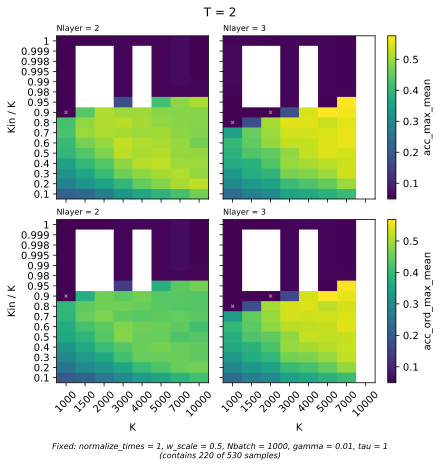

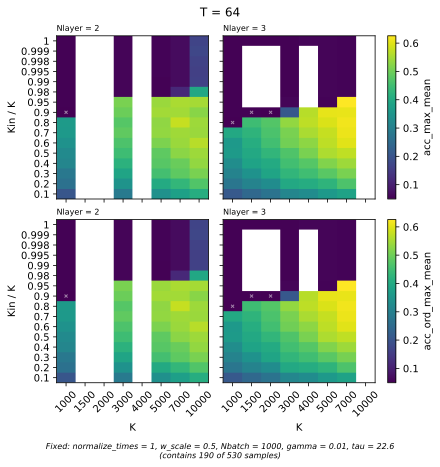

In [14]:
from typing import Literal
from matplotlib.axes import Axes
from pandas.core.api import DataFrame as DataFrame
from spikegd.utils.plotting import HeatmapPlot, Plot, PlotGrid, ValueTicks, _get_val_list


class NanXPlot(Plot):
    def __init__(self, key: str):
        self.key = key
    
    def draw_to_ax(
        self,
        grid: PlotGrid,
        full_df: DataFrame,
        ax: Axes,
        ax_df: DataFrame,
        func_key: str,
        func_agg: str | None,
    ) -> None:
        if len(grid.arg_keys) != 2:
            raise ValueError(
                "HeatmapPlot requires exactly two arg keys since it is 2-dimensional"
            )

        x_key, y_key = grid.arg_keys
        
        x_vals = _get_val_list(full_df, x_key, grid.min_points_per_ax)
        y_vals = _get_val_list(full_df, y_key, grid.min_points_per_ax)

        if not x_vals or not x_vals:
            return

        x_vals = np.sort(x_vals)
        y_vals = np.sort(y_vals)
        shape = (len(x_vals), len(y_vals))

        for x_i, y_i in np.ndindex(shape):
            mask = (ax_df[x_key] == x_vals[x_i]) & (ax_df[y_key] == y_vals[y_i])

            if not mask.any():
                continue

            losses = ax_df[mask][self.key]

            if losses.isna().all():
                ax.plot(x_i, y_i, "x", ms=3, color="white", alpha=0.5)
            elif losses.isna().any():
                ax.plot(x_i, y_i, ".", ms=3, color="white", alpha=0.5)


class RotateTicks(Plot):
    def __init__(self, axis: Literal["x", "y", "both"], angle: float = 45):
        self.axis: Literal["x", "y", "both"] = axis
        self.angle = angle

    def draw_to_ax(
        self,
        grid: PlotGrid,
        full_df: DataFrame,
        ax: Axes,
        ax_df: DataFrame,
        func_key: str,
        func_agg: str | None,
    ) -> None:
        ax.tick_params(axis=self.axis, rotation=self.angle)
        

PlotGrid(
    arg_keys=("config.K", "Kin / K"),
    func_keys=(
        "metrics.acc_max_mean",
        "metrics.acc_ord_max_mean",
        # "metrics.epoch_time_mean",
        # "metrics.silent_neurons_final_mean",
    ),
    func_aggs={"*": "mean"},
    plots=[
        HeatmapPlot(),
        NanXPlot("metrics.loss_final_mean"),
        ValueTicks(),
        RotateTicks("x")
    ],
    fixed_values={
        "config.normalize_times": True,
        "config.w_scale": 0.5,
        "config.Nbatch": 1000,
        "config.gamma": 0.01,
    },
    col_keys=("config.Nlayer"),
    fig_key="config.T",
    indep_keys=set(input_cols) - {"config.Kin"},
    key_format=key_format,
).show(trials_df)

In [15]:
# # SEABORN
# import seaborn as sns

# trials_data.computed("Kin / K", "`config.Kin` / `config.K`")

# for metric in ["metrics.acc_ord_max_mean"]:
#     grid = sns.FacetGrid(
#         trials_data.fix({
#             "config.normalize_times": True,
#             "config.w_scale": 0.5,
#             "config.Nbatch": 1000,
#             "config.gamma": 0.01,
#         }).df,
#         col="config.Nlayer",
#         row="config.T",
#         height=4,
#     )

#     @grid.map_dataframe
#     def draw_heatmap(data: pd.DataFrame, **kwargs):
#         pivot = data.pivot_table(
#             index="Kin / K",
#             columns="config.K",
#             values=metric,
#             aggfunc="mean",
#         )
#         sns.heatmap(
#             pivot,
#             vmin=0.05,
#             vmax=0.7,
#             annot=True, annot_kws={"fontsize": 7},
#             fmt=".2f",
#             xticklabels=True, yticklabels=True,
#             **kwargs
#         )

In [12]:
def get_variables(df, indep_keys):
    variables = {}
    for key in indep_keys:
        if len(vals := df[key].unique()) > 1:
            variables[key] = vals
    return variables

def expect_variables(df, indep_keys, expected_variables):
    variables = set(get_variables(df, indep_keys).keys())
    expect_variables = set(expected_variables)
    
    if variables != expect_variables:
        raise ValueError(f"Expected variables {expect_variables}, got {variables}")

def where_equals(df, values: dict):
    for key, value in values.items():
        df = df[df[key] == value]

    return df

## Best trials

===== BEST TRIAL 0 =====
CONFIG
- device_count            1
- seed                    0
- tau                     22.6
- I0                      1.25
- eps                     1e-06
- Nhidden                 128
- Nlayer                  3
- Nout                    20
- w_scale                 0.5
- T                       64
- dt                      0.001
- gamma                   0.01
- Nbatch                  1000
- lr                      0.004
- tau_lr                  100
- beta1                   0.9
- beta2                   0.999
- p_flip                  0
- Nepochs                 50
- Ntrain                  None
- Nin                     700
- Nsamples                3
- normalize_times         1
- K                       7000
- Kin                     6650
METRICS
- acc_init                      0.0435 ± 0.0069
- acc_final                     0.6135 ± 0.0069
- acc_min                       0.0435 ± 0.0069 at epoch 0
- acc_max                       0.6259 ± 0.0169 at epoc

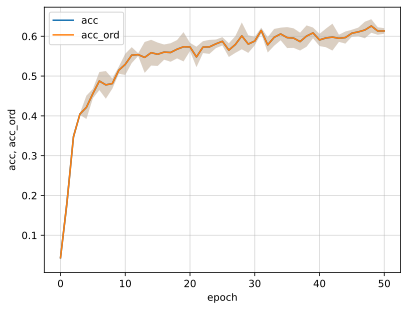

===== BEST TRIAL 1 =====
CONFIG
- device_count            1
- seed                    0
- tau                     22.6
- I0                      1.25
- eps                     1e-06
- Nhidden                 128
- Nlayer                  3
- Nout                    20
- w_scale                 0.5
- T                       64
- dt                      0.001
- gamma                   0.01
- Nbatch                  1000
- lr                      0.004
- tau_lr                  100
- beta1                   0.9
- beta2                   0.999
- p_flip                  0
- Nepochs                 50
- Ntrain                  None
- Nin                     700
- Nsamples                3
- normalize_times         1
- K                       7000
- Kin                     5600
METRICS
- acc_init                      0.0446 ± 0.0072
- acc_final                     0.6138 ± 0.0074
- acc_min                       0.0446 ± 0.0072 at epoch 0
- acc_max                       0.6138 ± 0.0074 at epoc

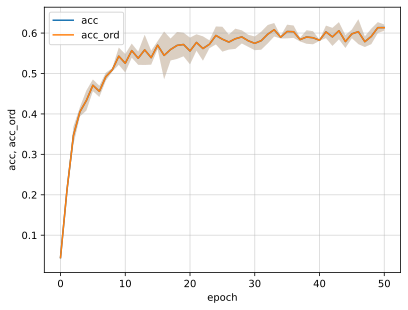

===== BEST TRIAL 2 =====
CONFIG
- device_count            1
- seed                    0
- tau                     22.6
- I0                      1.25
- eps                     1e-06
- Nhidden                 128
- Nlayer                  3
- Nout                    20
- w_scale                 0.5
- T                       64
- dt                      0.001
- gamma                   0.01
- Nbatch                  1000
- lr                      0.004
- tau_lr                  100
- beta1                   0.9
- beta2                   0.999
- p_flip                  0
- Nepochs                 50
- Ntrain                  None
- Nin                     700
- Nsamples                3
- normalize_times         1
- K                       7000
- Kin                     4900
METRICS
- acc_init                      0.0483 ± 0.0056
- acc_final                     0.6023 ± 0.0107
- acc_min                       0.0483 ± 0.0056 at epoch 0
- acc_max                       0.6094 ± 0.0147 at epoc

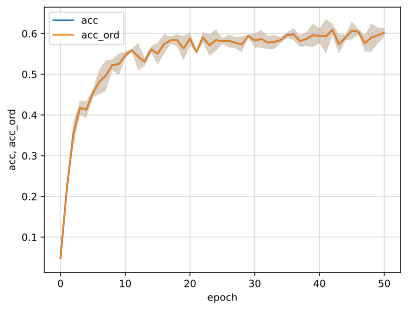

In [13]:
from spikegd.utils.formatting import print_dict

def plot_training_curves(config_hash, metrics=["acc", "acc_ord"]):
    trial_epochs = epochs_df[epochs_df["config_hash"] == config_hash]
    
    epochs = np.arange(len(trial_epochs))
    
    fig, ax = plt.subplots()

    for metric in metrics:
        mean_arr = trial_epochs[f"{metric}_mean"]
        std_arr = trial_epochs[f"{metric}_std"]

        na_count = np.isnan(mean_arr).sum()
        if na_count > 0:
            print(f"Warning: {na_count} NaN values in {metric}_mean")

        ax.plot(epochs, mean_arr, label=metric)
        ax.fill_between(epochs, mean_arr - std_arr, mean_arr + std_arr, alpha=0.2)

    ax.set_xlabel("epoch")
    ax.set_ylabel(", ".join(metrics))
    ax.grid(alpha=0.5)
    ax.legend()

    plt.show()

def summarize_trial(trial_row):
    print("CONFIG")
    print_dict(
        {
            "- " + key.removeprefix("config."): value
            for key, value in trial_row.items()
            if key.startswith("config.")
        }
    )
    print("METRICS")

    def summarize_metric(mean_key):
        std_key = mean_key.replace("_mean", "_std")
        epoch_key = mean_key.replace("_mean", "_epoch")

        s = f"{trial_row[mean_key]:.4f}"

        if std_key in trial_row:
            s += f" ± {trial_row[std_key]:.4f}"

        if epoch_key in trial_row:
            s += f" at epoch {trial_row[epoch_key]:.0f}"

        return s

    print_dict(
        {
            "- " + key.removeprefix("metrics.").removesuffix("_mean"): summarize_metric(key)
            for key, value in trial_row.items()
            if key.startswith("metrics.") and key.endswith("_mean")
        },
        indent=32,
    )

best_trials = trials_df \
    .sort_values("metrics.acc_ord_max_mean", ascending=False, ignore_index=True) \
    .head(3)

for i, best_trial in best_trials.iterrows():
    print(f"===== BEST TRIAL {i} =====")
    # print(f"Max accuracy: {best_trial['metrics.acc_max_mean']:.4f} ± {best_trial['metrics.acc_max_std']:.4f} at epoch {best_trial['metrics.acc_max_epoch']}")
    summarize_trial(best_trial)
    plot_training_curves(best_trial["config_hash"])